In [7]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

RESULTS_DIR = f"data/results/RAG/longmemeval/short/embeddings_nomic-ai_nomic-embed-text-v1_memory_ollama_gemma3:4b_judge_openai_gpt-5-mini"
#RESULTS_DIR = f"data/results/SAE/longmemeval/short/SAE_gemma-2b-it-res-jb_blocks.12.hook_resid_post_generator_ollama_gemma3:4b_judge_openai_gpt-5-mini"
#RESULTS_DIR = f"data/results/RAGSAE/longmemeval/short/SAE_gemma-2b-it-res-jb_blocks.12.hook_resid_post_embeddings_nomic-ai_nomic-embed-text-v1_generator_ollama_gemma3:4b_judge_openai_gpt-5-mini"


records = []

for file in os.listdir(RESULTS_DIR):
    if file.endswith(".json"):
        with open(os.path.join(RESULTS_DIR, file), "r", encoding="utf-8") as f:
            records.append(json.load(f))

In [8]:
# --- SCORE ---
scores = [r.get("answer_is_correct") for r in records if "answer_is_correct" in r]
avg_score = np.mean(scores)

# --- LATENCIA ---
latencies = [r["elapsed_time"] for r in records]
avg_latency = np.mean(latencies)
var_latency = np.var(latencies)

# --- AVG CONTEXT LENGTH ---
def context_length(s):
    if isinstance(s, str):
        return len(s.split())   # palabras
    else:
        return 0

context_lengths = [context_length(r["predicted_relevant_messages"]) for r in records]
avg_context_length = np.mean(context_lengths)


In [9]:
avg_score

np.float64(0.412)

In [12]:
avg_latency, var_latency

(np.float64(46.87552004013367), np.float64(319.311918420476))

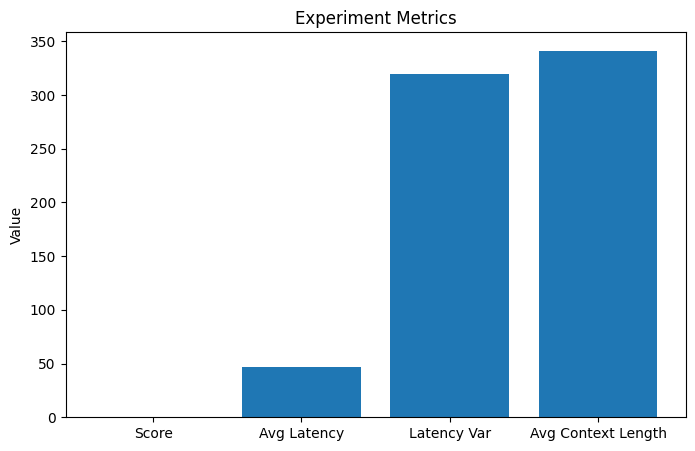

In [9]:
metrics = ["Score", "Avg Latency", "Latency Var", "Avg Context Length"]
values = [avg_score, avg_latency, var_latency, avg_context_length]

plt.figure(figsize=(8,5))
plt.bar(metrics, values)
plt.title("Experiment Metrics")
plt.ylabel("Value")
plt.show()


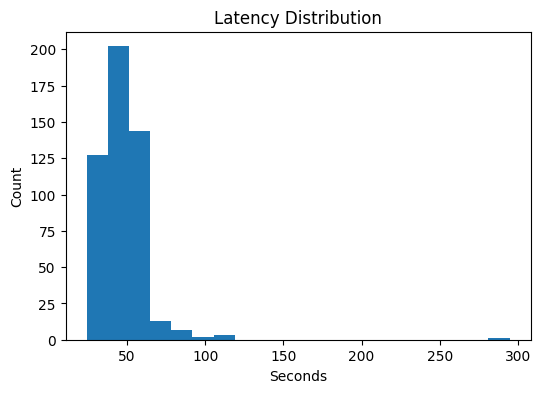

In [13]:
plt.figure(figsize=(6,4))
plt.hist(latencies, bins=20)
plt.title("Latency Distribution")
plt.xlabel("Seconds")
plt.ylabel("Count")
plt.show()
